In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

Cabeçalho das colunas:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Resumo estatístico das colunas:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
c

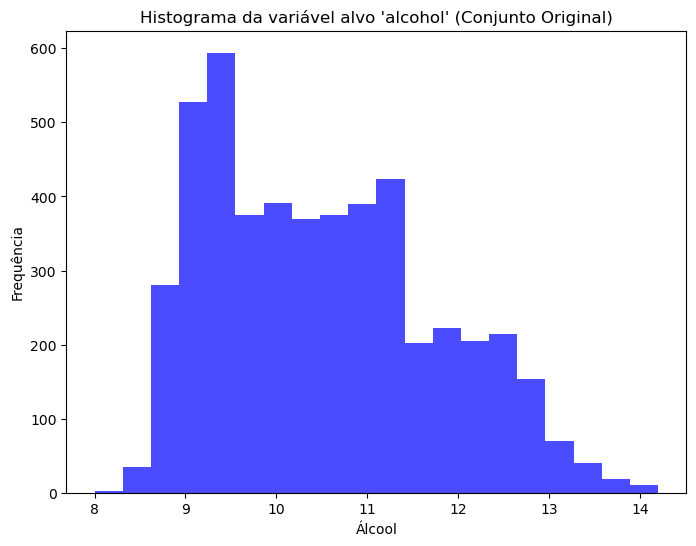

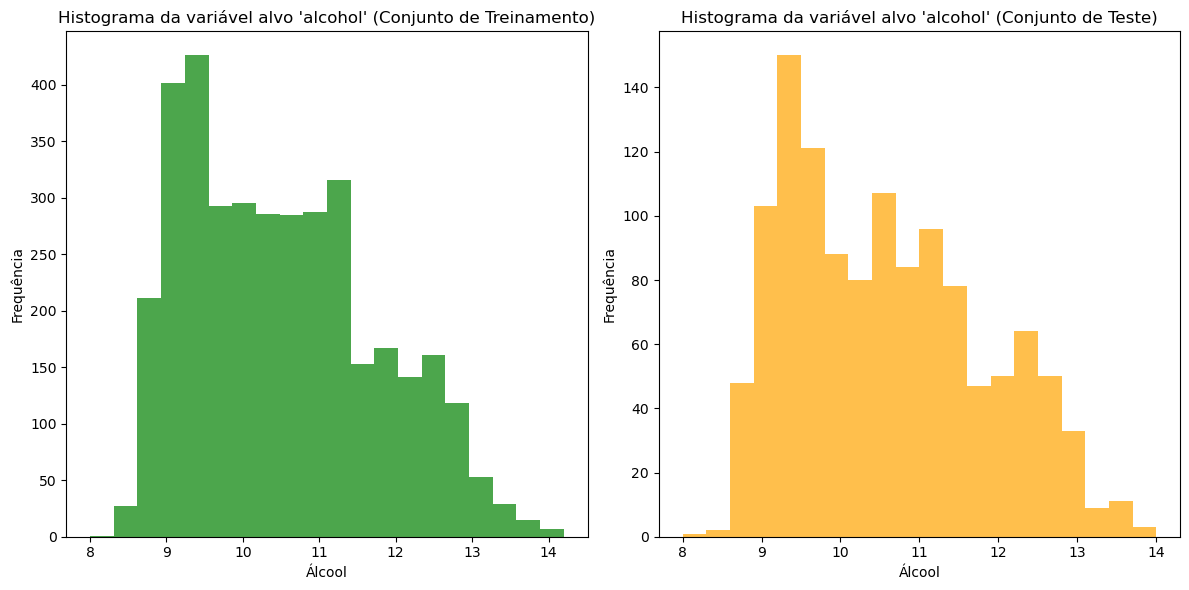

In [2]:
# Etapa 1: Ler a planilha CSV e fazer o pré-processamento inicial
wine_data = pd.read_csv("winequality-white.csv", sep=";")
print("Cabeçalho das colunas:")
print(wine_data.columns)
print("Resumo estatístico das colunas:")
print(wine_data.describe())

# Remover a coluna 'quality'
wine_data = wine_data.drop('quality', axis=1)

# Etapa 2: Separar os dados em conjuntos de treinamento e teste
train_data, test_data = train_test_split(wine_data, test_size=0.25, random_state=42)

# Salvar os conjuntos de treinamento e teste em arquivos CSV
train_data.to_csv("wine_train.csv", index=False)
test_data.to_csv("wine_test.csv", index=False)

# Plotar histograma da variável alvo no conjunto original
plt.figure(figsize=(8, 6))
plt.hist(wine_data['alcohol'], bins=20, color='blue', alpha=0.7)
plt.title("Histograma da variável alvo 'alcohol' (Conjunto Original)")
plt.xlabel("Álcool")
plt.ylabel("Frequência")
plt.show()

# Plotar histograma da variável alvo nos conjuntos de treinamento e teste
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_data['alcohol'], bins=20, color='green', alpha=0.7)
plt.title("Histograma da variável alvo 'alcohol' (Conjunto de Treinamento)")
plt.xlabel("Álcool")
plt.ylabel("Frequência")

plt.subplot(1, 2, 2)
plt.hist(test_data['alcohol'], bins=20, color='orange', alpha=0.7)
plt.title("Histograma da variável alvo 'alcohol' (Conjunto de Teste)")
plt.xlabel("Álcool")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

In [3]:
# Etapa 3: Pré-processamento e Normalização dos Dados
scaler = StandardScaler()

# Ajustar o scaler aos dados de treinamento e aplicá-lo a ambos os conjuntos
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

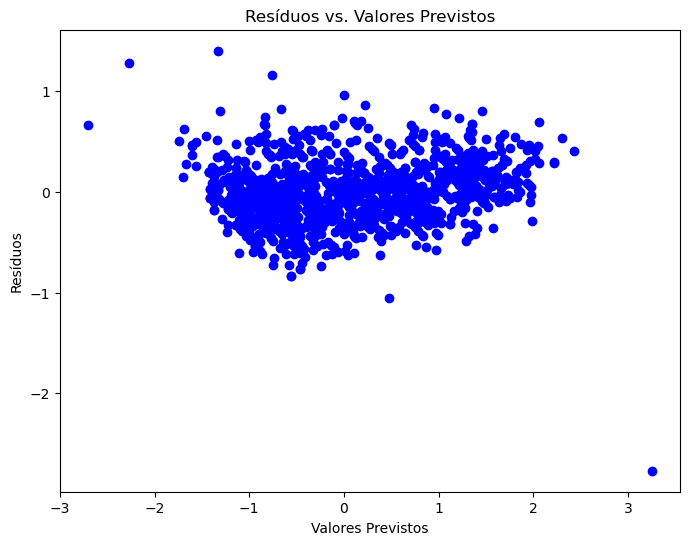

RMSE: 0.30775867888474473
R2: 0.9054313780025232


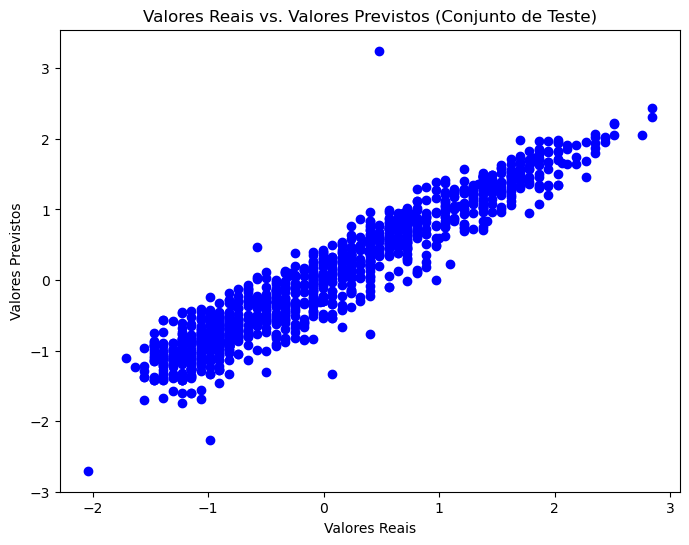

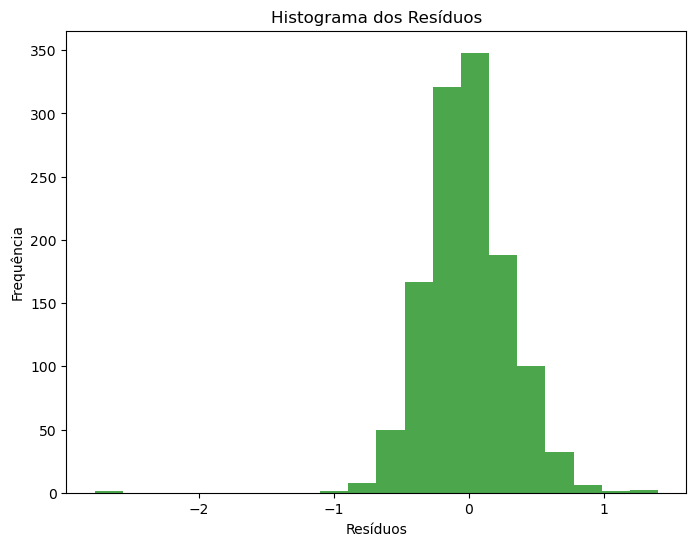

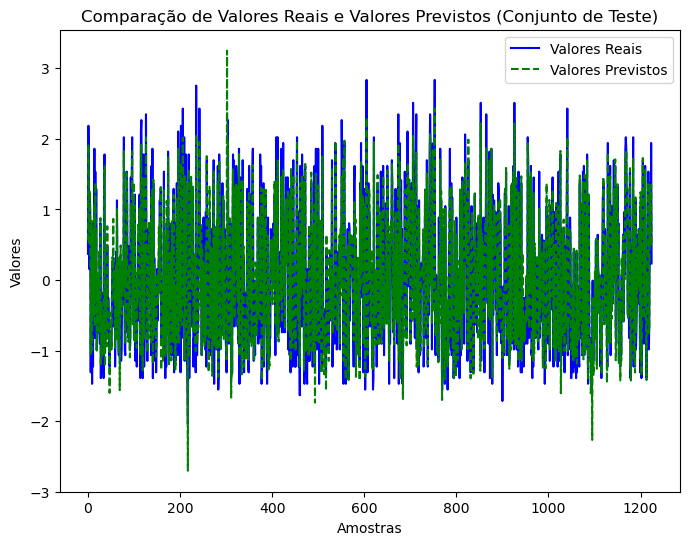

In [8]:
# Separar as variáveis independentes e a variável alvo nos conjuntos de treinamento e teste
X_train = train_data_scaled[:, :-1]
y_train = train_data_scaled[:, -1]
X_test = test_data_scaled[:, :-1]
y_test = test_data_scaled[:, -1]

# Treinar o modelo OLS
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = ols_model.predict(X_test)

# Calcular as métricas de desempenho
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Plotar resíduos vs. Valores previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test - y_pred, c='blue', marker='o')
plt.title("Resíduos vs. Valores Previstos")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.show()

# Imprimir os resultados
print("RMSE:", rmse)
print("R2:", r2)

# Gráfico de dispersão dos valores reais vs. valores previstos no conjunto de teste
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.title("Valores Reais vs. Valores Previstos (Conjunto de Teste)")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.show()

# Gráfico de histograma dos resíduos
plt.figure(figsize=(8, 6))
plt.hist(y_test - y_pred, bins=20, color='green', alpha=0.7)
plt.title("Histograma dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.show()

# Gráfico de linha que compara os valores previstos com os valores reais no conjunto de teste
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Valores Reais', color='blue')
plt.plot(y_pred, label='Valores Previstos', color='green', linestyle='--')
plt.title("Comparação de Valores Reais e Valores Previstos (Conjunto de Teste)")
plt.xlabel("Amostras")
plt.ylabel("Valores")
plt.legend()
plt.show()

Média RMSE (Validação Cruzada 5 dobras): 0.37666061850229826
Média R2 (Validação Cruzada 5 dobras): 0.8461056462580784


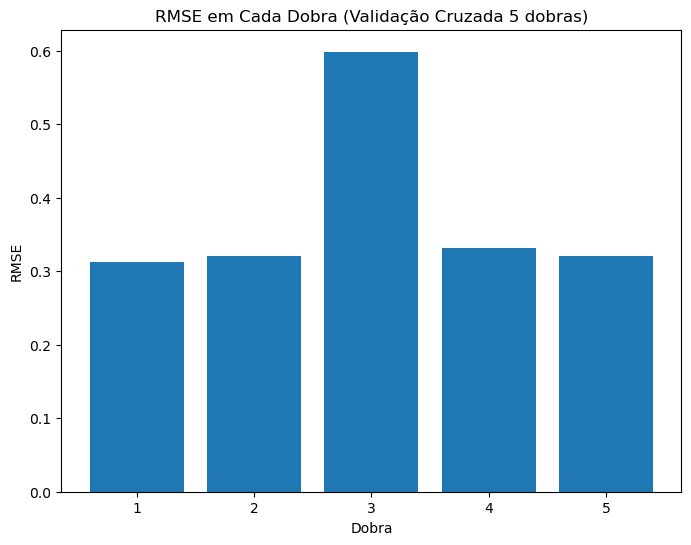

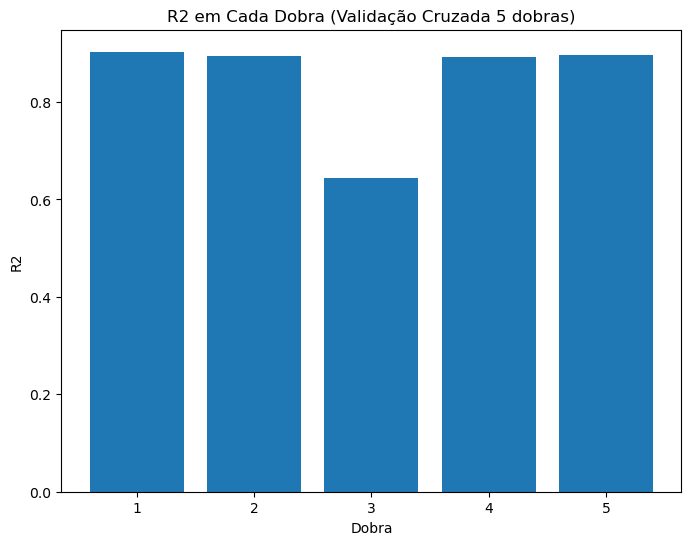

In [10]:
# Definir o modelo OLS
ols_model = LinearRegression()

# Realizar validação cruzada com 5 dobras
rmse_scores = cross_val_score(ols_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(ols_model, X_train, y_train, cv=5, scoring='r2')

# Calcular a média dos resultados
mean_rmse = -rmse_scores.mean()
mean_r2 = r2_scores.mean()

# Imprimir os resultados da validação cruzada
print("Média RMSE (Validação Cruzada 5 dobras):", mean_rmse)
print("Média R2 (Validação Cruzada 5 dobras):", mean_r2)

# Gráfico de barras dos RMSE em cada dobra
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), -rmse_scores)
plt.title("RMSE em Cada Dobra (Validação Cruzada 5 dobras)")
plt.xlabel("Dobra")
plt.ylabel("RMSE")
plt.show()

# Gráfico de barras dos R2 em cada dobra
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), r2_scores)
plt.title("R2 em Cada Dobra (Validação Cruzada 5 dobras)")
plt.xlabel("Dobra")
plt.ylabel("R2")
plt.show()

Média RMSE (Validação Cruzada 10 dobras): 0.3648746837662997
Média R2 (Validação Cruzada 10 dobras): 0.8438589769599467


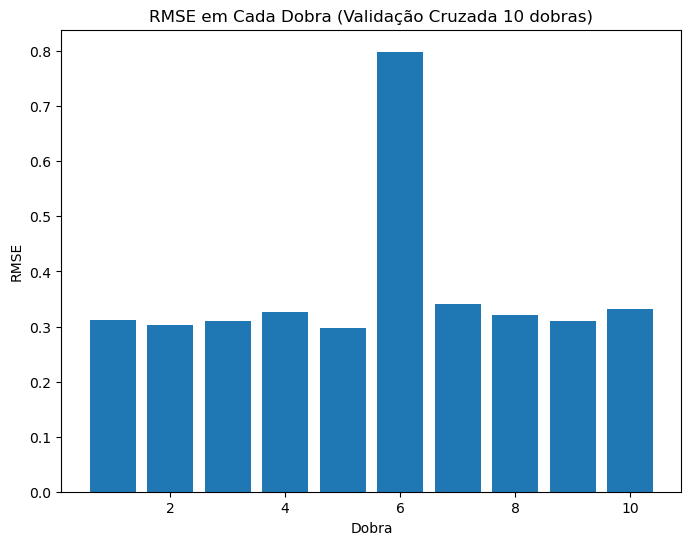

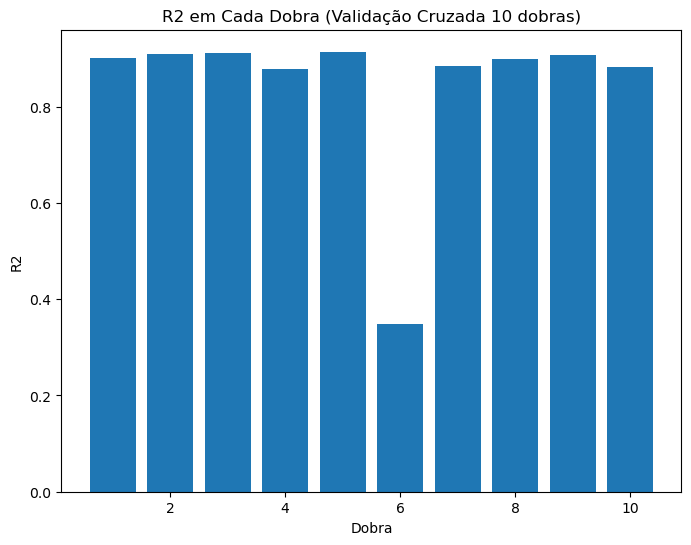

In [13]:
# Realizar validação cruzada com 10 dobras
rmse_scores = cross_val_score(ols_model, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(ols_model, X_train, y_train, cv=10, scoring='r2')

# Calcular a média dos resultados
mean_rmse = -rmse_scores.mean()
mean_r2 = r2_scores.mean()

# Imprimir os resultados da validação cruzada
print("Média RMSE (Validação Cruzada 10 dobras):", mean_rmse)
print("Média R2 (Validação Cruzada 10 dobras):", mean_r2)

# Gráfico de barras dos RMSE em cada dobra
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), -rmse_scores)
plt.title("RMSE em Cada Dobra (Validação Cruzada 10 dobras)")
plt.xlabel("Dobra")
plt.ylabel("RMSE")
plt.show()

# Gráfico de barras dos R2 em cada dobra
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), r2_scores)
plt.title("R2 em Cada Dobra (Validação Cruzada 10 dobras)")
plt.xlabel("Dobra")
plt.ylabel("R2")
plt.show()

In [14]:
#implementação do 0

In [17]:
# Função para normalização dos dados
def normalize_data(data):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    normalized_data = (data - means) / stds
    return normalized_data

# Separar as variáveis independentes e a variável alvo nos conjuntos de treinamento e teste
X_train = train_data_scaled[:, :-1]
y_train = train_data_scaled[:, -1]
X_test = test_data_scaled[:, :-1]
y_test = test_data_scaled[:, -1]

# Normalizar os dados
X_train_normalized = normalize_data(X_train)
X_test_normalized = normalize_data(X_test)

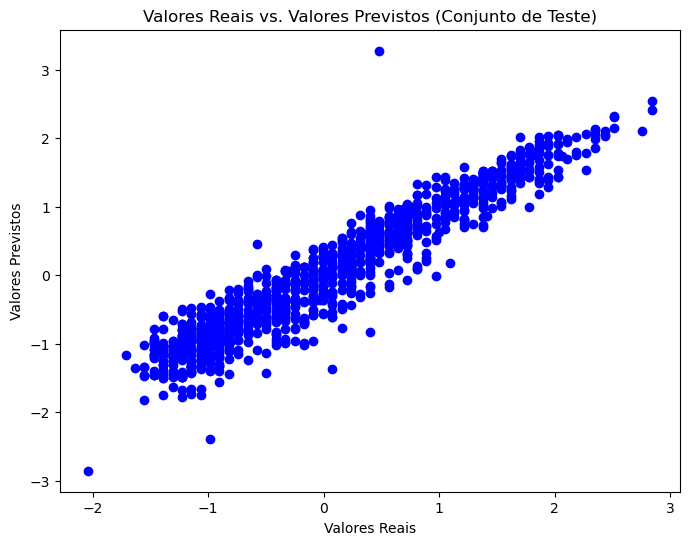

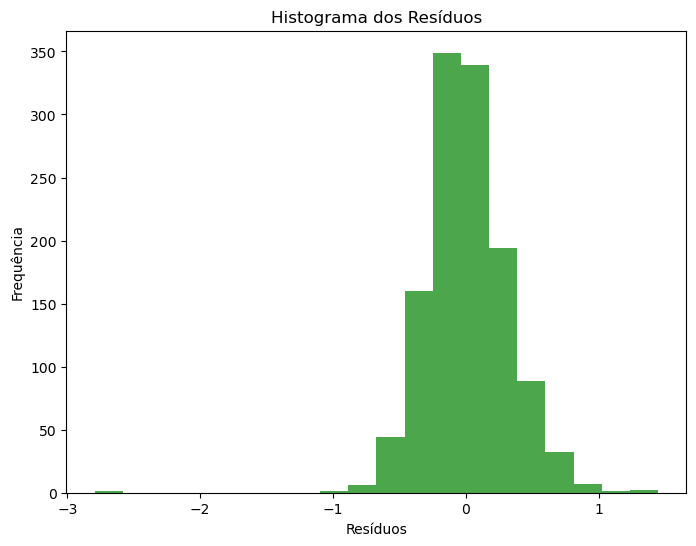

In [21]:
# Função para treinar o modelo OLS
def train_ols(X, y):
    # Adicionar uma coluna de uns a X para representar o termo de viés (intercepto)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Calcular os coeficientes usando o método dos mínimos quadrados
    coef = np.linalg.inv(X.T @ X) @ X.T @ y
    return coef

# Treinar o modelo OLS
ols_coef = train_ols(X_train_normalized, y_train)

# Função para fazer previsões com o modelo OLS
def predict_ols(coef, X):
    # Adicionar uma coluna de uns a X
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    y_pred = X @ coef
    return y_pred

# Fazer previsões no conjunto de teste
y_pred = predict_ols(ols_coef, X_test_normalized)

# Gráfico de dispersão dos valores reais vs. valores previstos no conjunto de teste
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.title("Valores Reais vs. Valores Previstos (Conjunto de Teste)")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.show()

# Gráfico de histograma dos resíduos
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.hist(residuals, bins=20, color='green', alpha=0.7)
plt.title("Histograma dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.show()

In [19]:
# Função para realizar validação cruzada de 5 dobras
def cross_validation_ols(X, y, num_folds=5):
    fold_size = X.shape[0] // num_folds
    rmse_scores = []
    r2_scores = []
    
    for i in range(num_folds):
        start = i * fold_size
        end = (i + 1) * fold_size
        
        X_val = X[start:end]
        y_val = y[start:end]
        X_train = np.concatenate([X[:start], X[end:]])
        y_train = np.concatenate([y[:start], y[end:]])
        
        coef = train_ols(X_train, y_train)
        y_pred = predict_ols(coef, X_val)
        
        rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
        r2 = 1 - np.sum((y_val - y_pred) ** 2) / np.sum((y_val - np.mean(y_val)) ** 2)
        
        rmse_scores.append(rmse)
        r2_scores.append(r2)
    
    return rmse_scores, r2_scores

# Realizar validação cruzada de 5 dobras
rmse_scores, r2_scores = cross_validation_ols(X_train_normalized, y_train)

# Calcular a média dos resultados
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

# Imprimir os resultados da validação cruzada
print("Média RMSE (Validação Cruzada 5 dobras):", mean_rmse)
print("Média R2 (Validação Cruzada 5 dobras):", mean_r2)

Média RMSE (Validação Cruzada 5 dobras): 0.3766223658758124
Média R2 (Validação Cruzada 5 dobras): 0.8462411352664025
